## 1.1 实例1：从一组看似混乱的数据中找出y≈2x的规律
    深度学习的主要步骤：
        1.准备数据
        2.搭建模型
        3.迭代训练
        4.使用模型

### 1.1.1 准备数据

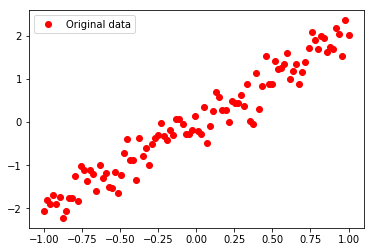

In [1]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

train_x = np.linspace(-1, 1, 100)
train_y = 2 * train_x + np.random.randn(*train_x.shape) * 0.3 # y=2x, 但加入了噪声
plt.plot(train_x, train_y, 'ro', label='Original data' )
plt.legend()

### 1.1.2 搭建模型
    搭建模型分为两个方向：正向和反向

In [2]:
# 正向搭建模型
# 占位符
X = tf.placeholder('float')
Y = tf.placeholder('float')
# 模型参数
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.zeros([1]), name='bias')
# 前向结构
z = tf.multiply(X, W)+b

Instructions for updating:
Colocations handled automatically by placer.


In [3]:
# 反向搭建模型
# 损失函数
cost = tf.reduce_mean(tf.square(Y-z))
# 学习率
learning_rate = 0.01
# 优化器
optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

Instructions for updating:
Use tf.cast instead.


### 1.1.3 迭代训练模型

Epoch: 1 cost= 0.10590773 W= [1.5347992] b= [0.16312751]
Epoch: 3 cost= 0.001903286 W= [1.9180471] b= [0.06168775]
Epoch: 5 cost= 0.00045234346 W= [2.0221064] b= [0.02252338]
Epoch: 7 cost= 0.0014374743 W= [2.0490966] b= [0.01217897]
Epoch: 9 cost= 0.0017821557 W= [2.0560765] b= [0.00950054]
Epoch: 11 cost= 0.0018772783 W= [2.0578809] b= [0.00880814]
Epoch: 13 cost= 0.0019023188 W= [2.058348] b= [0.00862899]
Epoch: 15 cost= 0.0019087923 W= [2.0584686] b= [0.00858258]
Epoch: 17 cost= 0.0019104802 W= [2.0584998] b= [0.00857065]
Epoch: 19 cost= 0.001910897 W= [2.0585077] b= [0.00856753]
Finished!
cost= 0.085618496 w= [2.0585082] b= [0.00856732]


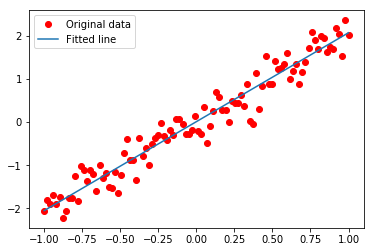

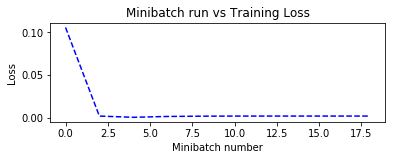

x=0.2, z= [0.42026898]


In [4]:
# 训练模型
# 初始化所有变量
init = tf.global_variables_initializer()
# 定义参数
training_epochs = 20 # 迭代次数
display_step = 2

def moving_average(a, w=10):
    if len(a) < 10:
        return a[:]
    return [val if idx < w else sum(a[(idx-w):idx])/w for idx, val in enumerate(a)]

# 启动session
with tf.Session() as sess:
    sess.run(init)
    plotdata = {'batch_num':[],'loss':[]} # 存放批次值和损失值
    # 向模型输入数据
    for epoch in range(training_epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
    # 显示训练中的详细信息
        if epoch % display_step == 0:
            loss = sess.run(cost, feed_dict={X:x, Y:y})
            print('Epoch:', epoch+1, 'cost=',loss, 'W=', sess.run(W), 'b=', sess.run(b))
            if not (loss=='NA'):
                plotdata['batch_num'].append(epoch)
                plotdata['loss'].append(loss)
    print('Finished!')
    print('cost=', sess.run(cost, feed_dict={X:train_x, Y:train_y}), 
          'w=', sess.run(W), 'b=', sess.run(b))
# 图形显示
    plt.plot(train_x, train_y, 'ro', label='Original data')
    plt.plot(train_x, sess.run(W) * train_x + sess.run(b), label='Fitted line')
    plt.legend()
    plt.show()
    
    plotdata['avgloss'] = moving_average(plotdata['loss'])
    plt.figure(1)
    plt.subplot(211)
    plt.plot(plotdata['batch_num'], plotdata['avgloss'], 'b--')
    plt.xlabel('Minibatch number')
    plt.ylabel('Loss')
    plt.title('Minibatch run vs Training Loss')
    plt.show()
# 1.1.4 使用模型
    print('x=0.2, z=', sess.run(z, feed_dict={X:0.2}))